# Lung Cancer Prediction Using XGBRegressor of xgboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

In [2]:
cancer_df=pd.read_csv(r'C:\Users\MOTIRAM SINGH\Desktop\example file\survey lung cancer.csv')

### Analyzing the dataframe

In [3]:
cancer_df.shape

(309, 16)

In [4]:
pd.set_option('display.max_rows',350)

In [5]:
cancer_df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [7]:
df=cancer_df.drop_duplicates()
df.shape

(276, 16)

In [8]:
df


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [9]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [23]:
def uniqueval(df):
    for column in df.columns:
        uni=df[column].unique()
        if len(uni)<6:
            print(column,'   ',uni,'   ',len(uni))

In [24]:
uniqueval(df)

GENDER     ['M' 'F']     2
SMOKING     [1 2]     2
YELLOW_FINGERS     [2 1]     2
ANXIETY     [2 1]     2
PEER_PRESSURE     [1 2]     2
CHRONIC DISEASE     [1 2]     2
FATIGUE      [2 1]     2
ALLERGY      [1 2]     2
WHEEZING     [2 1]     2
ALCOHOL CONSUMING     [2 1]     2
COUGHING     [2 1]     2
SHORTNESS OF BREATH     [2 1]     2
SWALLOWING DIFFICULTY     [2 1]     2
CHEST PAIN     [2 1]     2
LUNG_CANCER     ['YES' 'NO']     2


In [27]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['GENDER'])

C:\Users\MOTIRAM SINGH\AppData\Local\Temp\ipykernel_11980\1602255962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender']=le.fit_transform(df['GENDER'])


In [29]:
le=LabelEncoder()
df['result']=le.fit_transform(df['LUNG_CANCER'])

C:\Users\MOTIRAM SINGH\AppData\Local\Temp\ipykernel_11980\3231340609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['result']=le.fit_transform(df['LUNG_CANCER'])


In [30]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,gender,result
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,1,1
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,1,1
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,0,0
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1,0
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,0,0
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES,0,1
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES,1,1
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES,0,1
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO,0,0
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES,1,1


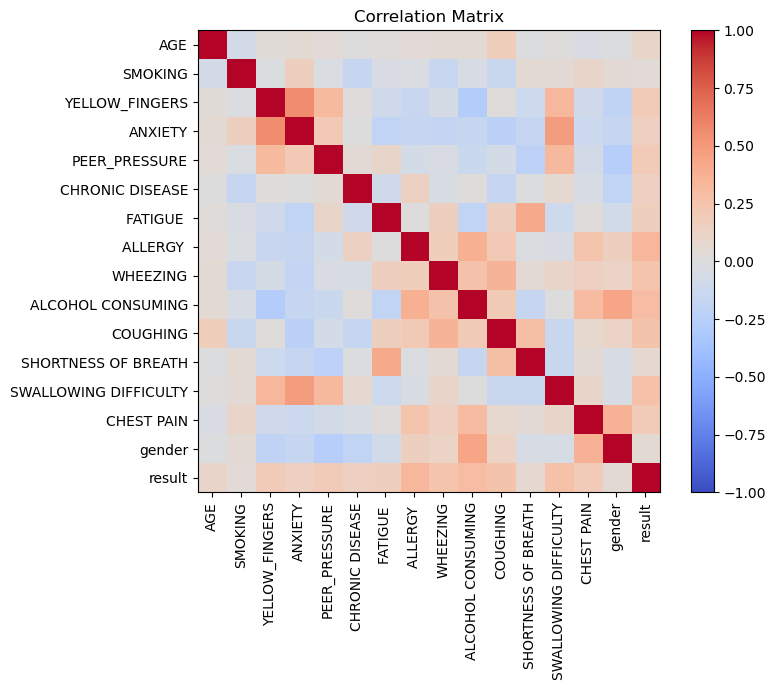

In [31]:
correlation_matrix = df.corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a heatmap using the correlation matrix
heatmap = ax.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Set the x-axis and y-axis labels
ax.set_xticks(range(len(correlation_matrix.columns)))
ax.set_yticks(range(len(correlation_matrix.columns)))
ax.set_xticklabels(correlation_matrix.columns, rotation=90)
ax.set_yticklabels(correlation_matrix.columns)

# Add a colorbar legend
cbar = plt.colorbar(heatmap)

# Set the title
ax.set_title('Correlation Matrix')

# Display the plot
plt.show()


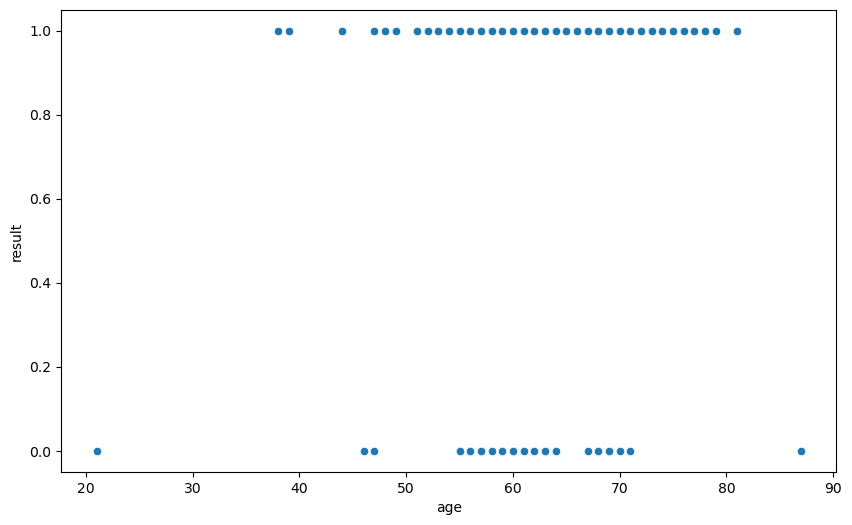

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='result',x='AGE',data=df)
plt.xlabel('age')
plt.ylabel('result')
plt.show()

In [36]:
df['LUNG_CANCER'].value_counts()

YES    238
NO      38
Name: LUNG_CANCER, dtype: int64

In [37]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'gender',
       'result'],
      dtype='object')

### Machine Learning use 

In [38]:
X=df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN','gender']]
y=df['result']

In [39]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=0)

In [41]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 70.9/70.9 MB 609.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from xgboost import XGBRegressor

In [43]:
xg=XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [44]:
pred=xg.predict(X_test)
pred

array([ 0.17389624,  1.0838349 ,  1.0043914 ,  1.0118159 ,  1.0279381 ,
        0.97497284,  1.0675648 ,  1.0100318 ,  1.0127207 , -0.02851157,
        1.0264868 ,  1.01887   ,  0.8960717 ,  0.981933  ,  0.7064895 ,
        0.28178903,  0.7864675 ,  0.21729377,  1.0151857 ,  0.1627949 ,
        0.99978334,  0.95760256,  0.99800634,  0.9800153 ,  0.6311657 ,
        1.0086023 ,  0.9949573 ,  1.0252985 ,  0.9945316 ,  0.97167444,
        1.0035558 ,  0.93767595,  1.0608624 ,  0.7167708 ,  1.0628929 ,
        1.055918  ,  0.01797718,  1.0004243 ,  1.035954  ,  0.9739305 ,
        0.8175916 ,  1.0001683 ,  1.0249438 ,  0.9742934 ,  0.69026023,
        1.0266358 ,  0.45993435,  0.99251264,  0.856075  ,  1.0014696 ,
        1.0007131 ,  0.11199665,  0.83474785,  0.9912786 ,  1.0030519 ,
        0.11435208,  0.9897433 ,  0.9810473 ,  1.0217744 ,  0.9177031 ,
        0.9988222 ,  0.8226383 ,  0.8940657 ,  1.0004312 ], dtype=float32)

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, accuracy_score,recall_score, precision_score,r2_score

In [47]:
mean_squared_error(y_test,pred)

0.08574946777819961

In [48]:
mean_absolute_error(y_test,pred)

0.14535167894791812

In [51]:
r2_score(y_test,pred)

0.2904448080414028